### Importations

In [1]:
import numpy as np              # pour les tableaux
import pandas as pd             # pour visualiser les données
import matplotlib.pyplot as plt # pour les graphiques

## Données relevées

!!! note Note
Pour éviter la verbosité de cette manière de créer des tableaux, il est possible de d'abord créer une liste *puis* de la convertir en tableau avec la fonction `np.asarray` (littéralement, « comme un tableau ») :
```
f = [1, 2, 3]
f = np.asarray(f)
```
!!!

In [2]:
V0 = [10 , 20 , 30 , 40 , 50 , 60 , 70] # cm^3
DV0 = np.ones(len(V0))/10               # cm^3
f0 = [29 , 21 , 17 , 15 , 13 , 12 , 11] # Hz
Df0 = np.ones(len(f0))                  # Hz
V0, DV0, f0, Df0 = np.asarray(V0), np.asarray(DV0), np.asarray(f0), np.asarray(Df0)

uV0 = DV0/np.sqrt(3) # cm^3
uf0 = Df0/np.sqrt(3) # Hz

### Erreurs relatives

In [3]:
eV0 = uV0/V0
ef0 = uf0/f0

!!! tip Conseil
Pour voir des ensembles de liste, il est pratique de faire un `DataFrame`, comme suit :
`visu = pd.DataFrame([f,A], index=['Fréquence', 'Amplitude a']).T`
et `.T` permet de transposer le tableau
!!!

In [4]:
visu = pd.DataFrame([V0, uV0, eV0, f0, uf0, ef0],
                    index=['Volume',
                           'Incertitude volume',
                           'Erreur volume',
                           'Fréquence',
                           'Incertitude fréquence',
                           'Erreur fréquence'
                          ]).T
visu

,Volume,Incertitude volume,Erreur volume,Fréquence,Incertitude fréquence,Erreur fréquence
0,10.0,0.057735,0.005774,29.0,0.57735,0.019909
1,20.0,0.057735,0.002887,21.0,0.57735,0.027493
2,30.0,0.057735,0.001925,17.0,0.57735,0.033962
3,40.0,0.057735,0.001443,15.0,0.57735,0.038490
4,50.0,0.057735,0.001155,13.0,0.57735,0.044412
5,60.0,0.057735,0.000962,12.0,0.57735,0.048113
6,70.0,0.057735,0.000825,11.0,0.57735,0.052486


### Conversion pour régression

In [5]:
X = 1/V0
Y = f0**2

### Propagation des erreurs
On admet que `eX = eV0` pour l'inverse, et que `eY = 2*ef0` pour le carré. Cf. https://www.physicsforums.com/threads/error-propagation-when-you-take-the-inverse.213794/

In [6]:
eX = eV0
eY = 2*ef0

uX = eX*X
uY = eY*Y

### Régression linéaire

!!! abstract Validation d'un modèle linéaire par régression

La fonction `polyfit(X,Y,d)` de la bibliothèque `numpy` ajuste au plus près 2 listes de données (abscisses `X`, ordonnées `Y`) par une fonction polynomiale de degrè `d`, et renvoie les coefficients du polynôme le mieux ajusté. Ainsi, pour le degrè 1, cela correspond à une regression linéaire $y = ax + b$.
!!!

In [7]:
a, b = np.polyfit(X, Y, 1)         # « a » le coefficient directeur, « b » l'ordonnée à l'origine
print(f"a = {a:.3f}, b = {b:.2f}") # .3f pour 3 valeurs après la virgule

a = 8399.969, b = 7.43


### Fonction pour le tracé

In [8]:
def y(x, a, b):
    return a*x + b

!!! abstract Tracé d'une fonction : abscisse
Une fonction en $\texttt{Python}$ reste une application qui donne une image à un antécédant. Pour pouvoir en faire la représentation graphique, il faut définir toute une série de points sur lesquels on veut tracer pour ensuite les relier un à un. Pour cela, `np.linspace` permet de découper un intervalle de la valeur minimale voulue à la valeur maximale voulue, avec un nombre de points $N$.

Ici, on veut tracer de la valeur minimale de `X` à la valeur maximale de `X`, en ayant suffisamment de points pour que le tracé soit efficace. Complétez le code suivant pour définir `wliste` la liste des valeurs de `X` sur laquelle tracer.
!!!

In [9]:
xliste = np.linspace(0, max(X), 300)

!!! tip Indice
Les fonctions `min` et `max` existent.
!!!

!!! abstract Tracé d'une fonction : ordonnée
On a dont toutes les briques pour tracer la fonction : la fonction en elle-même, les valeurs d'abscisse, et les meilleurs paramètres. Pour avoir les ordonnées, il suffit de calculer `f(x, a, b)`.
!!!

In [10]:
yliste = y(xliste, a, b)

!!! warning Attention
<center><b>
La seule façon valable de conclure à la validité d’une régression linéaire est une représentation graphique où l’on observe l’alignement des points avec la droite de régression.
</center>
!!!

## Validation graphique avec barres d'erreur

!!! abstract Note
Afin d’ajouter des barres d’erreurs sur un graphique, il faut remplacer la fonction `plt.plot` par la fonction `plt.errorbar`. Une série de nouveaux paramètres permettent de personnaliser ces barres d’erreur.
!!!

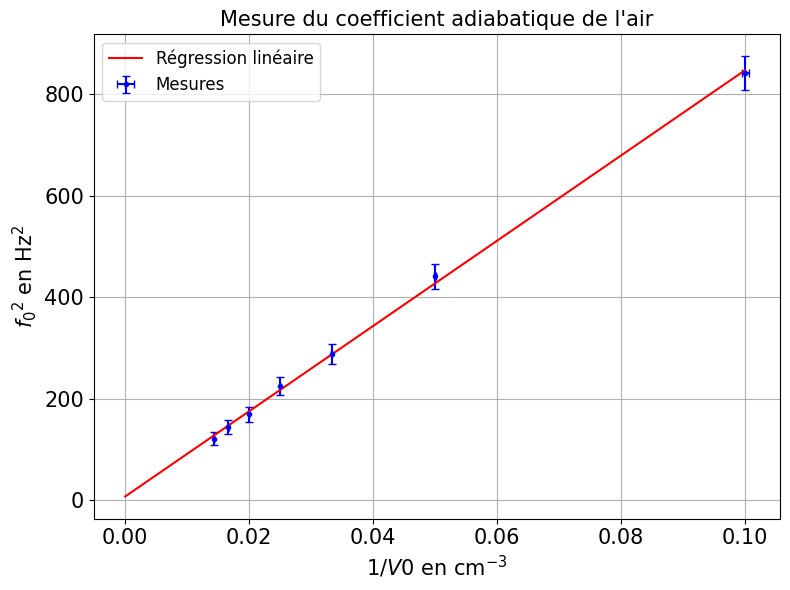

In [19]:
plt.close()                                 # force la fermeture des figures précédentes

plt.figure(figsize=(8, 6))                  # dimension horizontale, verticale
plt.grid()                                  # affiche un quadrillage de lecture
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.xlabel('$1/V0$ en cm$^{-3}$',           # Donne le nom de l'axe x, avec $$ pour le mode math
           fontsize=15)                     # en grand
plt.ylabel('$f_0{}^2$ en Hz$^2$',           # Donne le nom de l'axe y, avec $$ pour le mode math
           fontsize=15)                     # en grand

plt.errorbar(X, Y,                          # trace les données avec des barres d'erreurs ux et uy
             xerr=uX, yerr=uY,
             fmt='.',
             capsize=3,   # possibilité de personnalisation, importante
             color='b', label='Mesures')    # légende

plt.plot(xliste, yliste,                       # trace un graphe avec xlin en abscisse et yreg en ordonnée
         'r', label='Régression linéaire')

plt.title("Mesure du coefficient adiabatique de l'air",
          fontsize=15)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

!!! note Note
Toutes les options de `grid`, `xticks` etc sont optionnelles, et ne sont pas à retenir. Ce qu'il est exigible que vous reteniez est simplement :
```
X = np.array([0 , 2 , 4 , 6 , 8 , 10])
Y = np.array([0.5 , 7.9 , 11 , 17.5 , 26 , 31.8])
y_reg = a*X+b

plt.scatter(X, Y)
plt.plot(X, y_reg)

plt.show()
```
Je vous invite à essayer de lancer ces commandes et voir la différence… c'est ce qui pourra vous dinstinguer d'um élève lambda à quelqu'um d'investix et avec le sens de la présentation scientifique. À bon entendeur !
!!!

### Détermination de la valeur de $\gamma$

In [12]:
m = 8.8e-3          # kg
P0 = 0.995e5        # Pa = N.m⁻²
d = 13.97e-3        # m
a_cor = a*(1e-2)**3 # 1cm³ = 10⁻⁶m³

gamma = 64*a_cor*m/(P0*d**4)
print(f'gamma = {gamma:.2f}')

gamma = 1.25


## Simulation de Monte-Carlo pour obtenir des incertitudes sur la pente et l'ordonnée à l'origine

Pour obtenir des incertitudes sur $a$ et $b$, nous allons:

- faire varier aléatoirement les $n$ couples de valeurs mesurées $(x_i,y_i)$ selon des **lois de probabilité uniformes rectangulaires** de demi-largeur la précision $\Delta(x_i) = \sqrt{3}u(x_i)$, simulée grâce à la fonction `np.random.uniform` (même chose pour $y_i$).
- Pour chaque série de mesures simulée, faire la regression  linéaire, et obtenir des valeurs de pente $a_k$ et d'ordonnée à l'origine $b_k$. 
- La meilleur estimation de $a$ et $b$ sera la moyenne des valeurs calculées 
- Les incertitude $u(a)$ et $u(b)$ sur ces moyennes seront l'écart-type expérimental des valeurs calculées.

In [13]:
# ===========================================================================#
#                                   Calculs                                  #
# ===========================================================================#

Delta_X = uX*np.sqrt(3)
Delta_Y = uY*np.sqrt(3)

N = 10000                  # nombre de régressions à effectuer

alist, blist = [], []      # création des listes vides pour stocker les valeurs
for i in range(N):
    x_simu = X + Delta_X*np.random.uniform(-1, 1)
    y_simu = Y + Delta_Y*np.random.uniform(-1, 1)

    p = np.polyfit(x_simu, y_simu, 1)

    alist.append(p[0])
    blist.append(p[1])

# ===========================================================================#
#                                 Utilisation                                #
# ===========================================================================#

a_mean, b_mean = np.mean(alist), np.mean(blist)
ua, ub = np.std(alist, ddof=1), np.std(blist, ddof=1)

print('Coef.directeur =', f'{a_mean:.3f}',       #.3e pour écriture scientifique
      '±', f'{ua:.3f}')                          # avec 3 chiffres significatifs
print("Ordonnée à l'origine =", f'{b_mean:.3f}', # ATTENTION à la rédaction
      '±', f'{ub:.3f}')                          # finale d'une mesure…

Coef.directeur = 8396.021 ± 245.315
Ordonnée à l'origine = 7.163 ± 10.708


### Estimations basses et hautes de gamma

In [14]:
a_min = a_mean-ua*np.sqrt(3)    # on utilise l'incertitude élargie
a_max = a_mean+ua*np.sqrt(3)

a_cor_mean = a_mean*(1e-2)**3 # 1cm³ = 10⁻⁶m³
a_cor_min = a_min*(1e-2)**3 # 1cm³ = 10⁻⁶m³
a_cor_max = a_max*(1e-2)**3 # 1cm³ = 10⁻⁶m³

g_mean = 64*a_cor_mean*m/(P0*d**4)
g_min = 64*a_cor_min*m/(P0*d**4)
g_max = 64*a_cor_max*m/(P0*d**4)
ug = (g_max-g_min)/(2*np.sqrt(3))

print(f'gamma = {g_mean:.2f} ± {ug:.2f}')

gamma = 1.25 ± 0.04


In [15]:
E_n = (1.4-g_mean)/(ug)
E_n

4.17618081095967